In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Create an inspector object
inspector = inspect(engine)

# Get the list of table names
tables = inspector.get_table_names()

# Print the table names
for table in tables:
    print(table)


measurement
station


In [7]:
# Reflect the tables
Base = automap_base()
Base.prepare(engine)

# Create a session
session = Session(engine)

# Get the list of table names
inspector = inspect(engine)
tables = inspector.get_table_names()

In [8]:
# Access the tables
Station = Base.classes.station
Measurement = Base.classes.measurement

# Query all rows from the station table
stations = session.query(Station).all()

# Query all rows from the measurement table
measurements = session.query(Measurement).all()

# Convert Station data to DataFrame
stations_df = pd.DataFrame([vars(station) for station in stations[:10]])

# Convert Measurement data to DataFrame
measurements_df = pd.DataFrame([vars(measurement) for measurement in measurements[:10]])

In [9]:
# THIS ISN'T EXPLICIT IN THE ASSIGNMENT BUT IT HELPS ME UNDERSTAND WHAT I NEED TO ACCOMPLISH
stations_df

,_sa_instance_state,longitude,station,name,latitude,id,elevation
0,<sqlalchemy.orm.state.InstanceState object at ...,-157.81680,USC00519397,"WAIKIKI 717.2, HI US",21.27160,1,3.0
1,<sqlalchemy.orm.state.InstanceState object at ...,-157.80150,USC00513117,"KANEOHE 838.1, HI US",21.42340,2,14.6
2,<sqlalchemy.orm.state.InstanceState object at ...,-157.83740,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,3,7.0
3,<sqlalchemy.orm.state.InstanceState object at ...,-157.97510,USC00517948,"PEARL CITY, HI US",21.39340,4,11.9
4,<sqlalchemy.orm.state.InstanceState object at ...,-158.01110,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,5,306.6
5,<sqlalchemy.orm.state.InstanceState object at ...,-157.71139,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,6,19.5
6,<sqlalchemy.orm.state.InstanceState object at ...,-157.84889,USC00519281,"WAIHEE 837.5, HI US",21.45167,7,32.9
7,<sqlalchemy.orm.state.InstanceState object at ...,-157.99920,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,8,0.9
8,<sqlalchemy.orm.state.InstanceState object at ...,-157.80250,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,9,152.4


In [10]:
# THIS ISN'T EXPLICIT IN THE ASSIGNMENT BUT IT HELPS ME UNDERSTAND WHAT I NEED TO ACCOMPLISH
measurements_df

,_sa_instance_state,tobs,date,station,prcp,id
0,<sqlalchemy.orm.state.InstanceState object at ...,65.0,2010-01-01,USC00519397,0.08,1
1,<sqlalchemy.orm.state.InstanceState object at ...,63.0,2010-01-02,USC00519397,0.00,2
2,<sqlalchemy.orm.state.InstanceState object at ...,74.0,2010-01-03,USC00519397,0.00,3
3,<sqlalchemy.orm.state.InstanceState object at ...,76.0,2010-01-04,USC00519397,0.00,4
4,<sqlalchemy.orm.state.InstanceState object at ...,73.0,2010-01-06,USC00519397,NaN,5
5,<sqlalchemy.orm.state.InstanceState object at ...,70.0,2010-01-07,USC00519397,0.06,6
6,<sqlalchemy.orm.state.InstanceState object at ...,64.0,2010-01-08,USC00519397,0.00,7
7,<sqlalchemy.orm.state.InstanceState object at ...,68.0,2010-01-09,USC00519397,0.00,8
8,<sqlalchemy.orm.state.InstanceState object at ...,73.0,2010-01-10,USC00519397,0.00,9
9,<sqlalchemy.orm.state.InstanceState object at ...,64.0,2010-01-11,USC00519397,0.01,10


In [11]:
# View all of the classes that automap found
classes = Base.classes

for class_name in classes.keys():
    print(class_name)


station
measurement


In [12]:
# Save references to each table
# ADDRESSED ABOVE BEFORE DATA FRAMES, BLOCK 5 AFTER THE SECTION HEADING

In [13]:
# Create our session (link) from Python to the DB
# ADDRESSED ABOVE BEFORE DATA FRAMES, BLOCK 4 AFTER THE SECTION HEADING

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.

most_recent_date = session.query(func.max(Measurement.date)).scalar()

print(most_recent_date)

2017-08-23


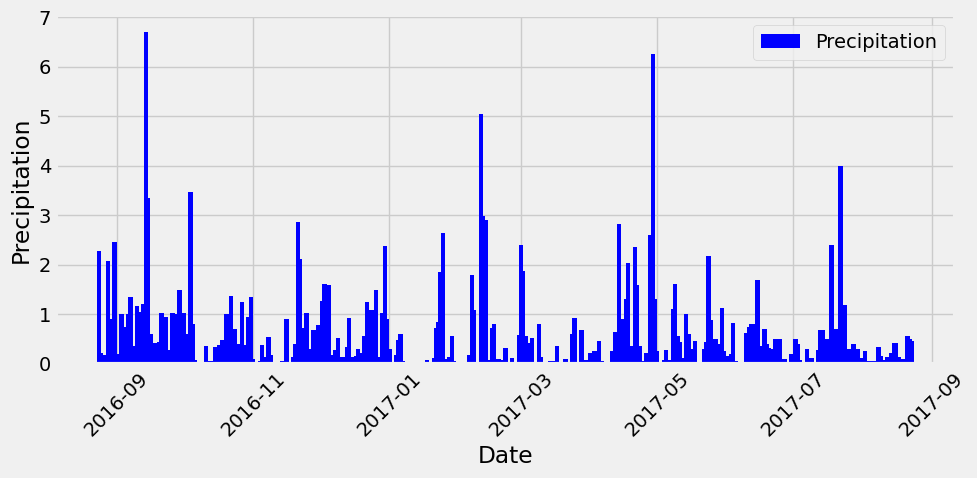

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# RUNNING THIS LINE FROM ABOVE SO THAT THE CODE IN THIS BLOCK RUNS INDEPENDENTLY OF THE ONE
# ABOVE. FOR GRADING CLARITY THAT MY CODE WORKS.

most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Calculate the date one year ago from the most recent date
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_lookback = most_recent_date - timedelta(days=365)

# Query the last 12 months of precipitation data
last_12_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_lookback).all()

# Filter out None, DOESN'T APPEAR NECESSARY
last_12_months = [(date, prcp) for date, prcp in last_12_months if date is not None and prcp is not None]

# Convert to DataFrame
last_12_months_df = pd.DataFrame(last_12_months, columns=['date', 'prcp'])

# Convert the date to datetime
last_12_months_df['date'] = pd.to_datetime(last_12_months_df['date'])

# Set date as index
last_12_months_df.set_index('date', inplace=True)

# Bar chart
plt.figure(figsize=(10, 5))
plt.bar(last_12_months_df.index, last_12_months_df['prcp'], label='Precipitation', color='blue', width=2)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = last_12_months_df['prcp'].describe()
summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df = summary_statistics_df.rename(columns={'prcp': 'Precipitation'})
summary_statistics_df

# MY TOTAL COUNT IS DIFFERENT THAN THE EXAMPLE BY 6. UNKNOWN WHY. NOT RELATED TO DROPPING
# THE NONES

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset

unique_station_count = session.query(func.count(func.distinct(Station.station))).scalar()
print("Number of Unique Stations:", unique_station_count)


Number of unique stations: 9


In [50]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# Query to count the number of rows associated with each station
station_observation_count = session.query(Station.station, func.count()).join(Measurement, Station.station == Measurement.station).group_by(Station.station).order_by(func.count().desc()).all()

# Print the station and the number of rows associated with each station
for station, row_count in station_observation_count:
    print(station + ":", row_count)
print()
most_active_station, most_observations = station_observation_count[0]
print(f"Station {most_active_station} has the most observations ({most_observations}) associated with it.")


USC00519281: 2772
USC00519397: 2724
USC00513117: 2709
USC00519523: 2669
USC00516128: 2612
USC00514830: 2202
USC00511918: 1979
USC00517948: 1372
USC00518838: 511

Station USC00519281 has the most observations (2772) associated with it.


In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_station

# Calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()

# Print the temperature statistics
print(f"Lowest Temperature: {temperature_stats[0][0]}")
print(f"Highest Temperature: {temperature_stats[0][1]}")
print(f"Average Temperature: {temperature_stats[0][2]}")


Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


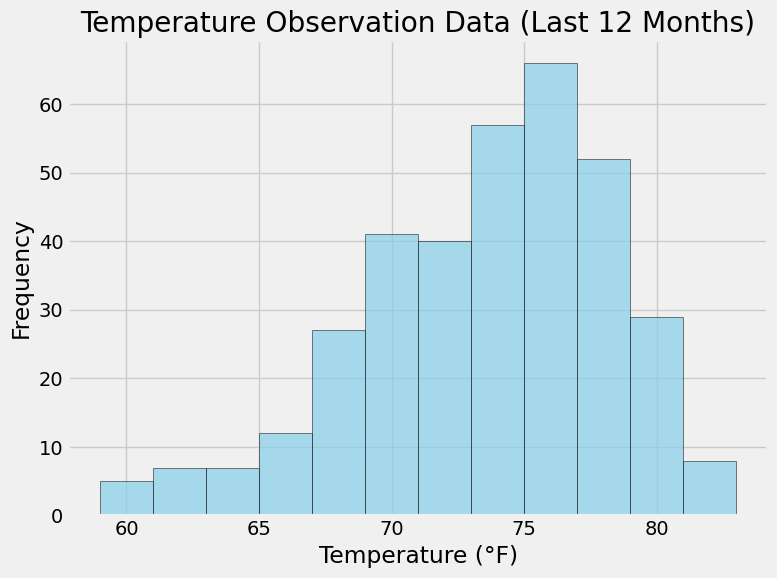

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station_id, Measurement.date >= one_year_lookback).all()

# Extract the temperature values from the result
temperatures = [temp[0] for temp in temperature_data]

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data (Last 12 Months)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Close Session

In [54]:
# Close Session
session.close()